## Dataset generation from deformable mirror and GRIN fiber

In [1]:
%load_ext autoreload
%autoreload 2

from lib.grid import Grid
from lib.fiber import GrinFiber
from lib.datasets import SimulatedGrinSpeckleOutputDataset, GrinLPSpeckleDataset, GrinLPDegenSpeckleDataset

In [ ]:
fiber = GrinFiber(radius=26e-6, wavelength=1064e-9, n1=1.465, n2=1.45)
matrix = fiber.modes_coupling_matrix(complex=True)
grid = Grid(pixel_size=0.5e-6)
# dset = GrinLPSpeckleDataset(fiber, grid, length=500, N_modes=55, coupling_matrix=None)
dset = GrinLPDegenSpeckleDataset(fiber, grid, length=7000, N_modes=55, coupling_matrix=None)
# dset.compute_fourier_transforms()
dset.export(return_fields=True)

In [2]:
grid = Grid(pixel_size=0.5e-6, pixel_numbers=(128,128))
fiber = GrinFiber(radius=26e-6, wavelength=1064e-9, n1=1.465, n2=1.45)
print(fiber)
coupling_matrix = fiber.modes_coupling_matrix(complex=complex, full=False, degen=True)

GrinFiber instance with:
  - Radius: 26.0 um
  - Core index: 1.465
  - Cladding index: 1.45
  - Wavelength: 1064.0 nm
  - Numerical aperture: 0.209
  - Number of guided LP modes: 64
  - Number of guided LP modes (counting degenerates): 113
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[1.465      0.         0.         1.        ]
 [1.46407036 1.         0.         2.        ]
 [1.46314072 2.         1.         1.        ]
 [1.46314072 2.         0.         3.        ]
 [1.46221107 3.         1.         2.        ]
 [1.46221107 3.         0.         4.        ]
 [1.46128143 4.         2.         1.        ]
 [1.46128143 4.         1.         3.        ]
 [1.46128143 4.         0.         5.        ]
 [1.46035179 5.         2.         2.        ]]


In [10]:
dset = SimulatedGrinSpeckleOutputDataset(fiber, grid, length=5000, N_modes=113, degen=True, noise_std=0/100)
dset._coupling_matrix = coupling_matrix
dset.compute_from_transfer_matrix(phases_dim=(6,6))
dset.compute_fourier_transforms(pad=2)
# 

Computed couple 1/5000
Computed couple 2/5000
Computed couple 3/5000
Computed couple 4/5000
Computed couple 5/5000
Computed couple 6/5000
Computed couple 7/5000
Computed couple 8/5000
Computed couple 9/5000
Computed couple 10/5000
Computed couple 11/5000
Computed couple 12/5000
Computed couple 13/5000
Computed couple 14/5000
Computed couple 15/5000
Computed couple 16/5000
Computed couple 17/5000
Computed couple 18/5000
Computed couple 19/5000
Computed couple 20/5000
Computed couple 21/5000
Computed couple 22/5000
Computed couple 23/5000
Computed couple 24/5000
Computed couple 25/5000
Computed couple 26/5000
Computed couple 27/5000
Computed couple 28/5000
Computed couple 29/5000
Computed couple 30/5000
Computed couple 31/5000
Computed couple 32/5000
Computed couple 33/5000
Computed couple 34/5000
Computed couple 35/5000
Computed couple 36/5000
Computed couple 37/5000
Computed couple 38/5000
Computed couple 39/5000
Computed couple 40/5000
Computed couple 41/5000
Computed couple 42/5000
C

In [9]:
dset.export(return_output_fields=True, add_exp_noise=True)

Dataset saved: .\synth_dset_grin_Nmodes=113_degen=True_len=5000_mirr=36.mat


In [6]:
dset._transfer_matrix.shape
dset.reshaped_transfer_matrix.shape

(16384, 36)

0.9999999999999999
1.0


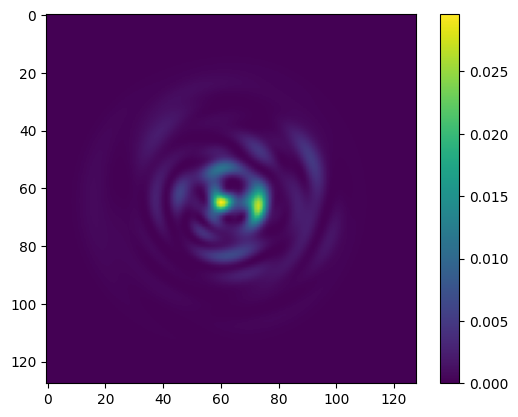

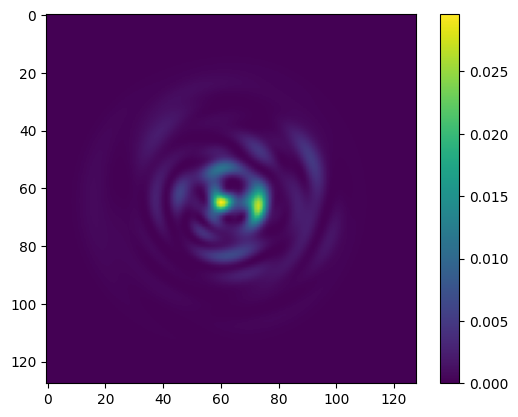

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import speckleret as spr

idx = 8

import fibernet 

weights = fibernet.dataset._utils.make_bellshaped_plane_2d(np.zeros((6,6)), width=5.1e-3)
# weights = weights.reshape(-1)

x = np.sqrt(dset._normalized_energy_on_macropixels) * np.exp(1j * dset._phase_maps[:,:,idx].reshape(6,6))
# x = dset._normalized_energy_on_macropixels * np.exp(1j * dset._phase_maps[:,:,idx].reshape(6,6))
# x = np.ones(dset._normalized_energy_on_macropixels.shape) * np.exp(1j * dset._phase_maps[:,:,idx].reshape(6,6))
# x = weights * np.exp(1j * dset._phase_maps[:,:,idx].reshape(6,6))
# x = dset._normalized_energy_on_macropixels * dset._phase_maps[:,:,idx].reshape(6,6)
# x = np.ones(dset._normalized_energy_on_macropixels.shape) * dset._phase_maps[:,:,idx].reshape(6,6)
# x = weights * dset._phase_maps[:,:,idx].reshape(6,6)
x = x.flatten()

tm = dset.reshaped_transfer_matrix
y = (tm @ x).reshape(dset._grid.pixel_numbers)


print(spr.metrics.pearson(y, dset._fields[:,:,idx]))
print(spr.metrics.quality(y, dset._fields[:,:,idx]))

plt.imshow(np.square(np.abs(y)))
plt.colorbar()
plt.show()

plt.imshow(np.abs(dset.intensities[:,:,idx]))
plt.colorbar()
plt.show()


